# Dogcattack - DL algorithm to find kitties and puppies

I'm writing this code as to try out CNN algorithms with TensorFlow (Keras).

This algorithm was made as homework from [Daniel Bourke's DL course from Udemy](https://www.udemy.com/course/tensorflow-developer-certificate-machine-learning-zero-to-mastery/).

In [1]:
# Import dependencies

# TensorFlow
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data manipulation
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Files libraries
import zipfile
import pathlib
import os

## Import and organize data

Importing data from [Cat and Dog](https://www.kaggle.com/datasets/tongpython/cat-and-dog/data) Kaggle dataset.

In [2]:
# Import files
!kaggle datasets download -d tongpython/cat-and-dog

# Unzip files
zip = zipfile.ZipFile('cat-and-dog.zip')
zip.extractall()
zip.close()

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
100% 218M/218M [00:02<00:00, 124MB/s]
100% 218M/218M [00:02<00:00, 79.3MB/s]


In [3]:
# Remove .zip
!rm 'cat-and-dog.zip'

In [4]:
# Create folder to organize it
!mkdir dogcattack

# Move test_set and training_set to dogcattack folder
!mv 'test_set/test_set/' 'dogcattack/'
!mv 'training_set/training_set/' 'dogcattack/'

In [5]:
# Remove test_set and training_set original folders
!rm -r 'test_set'
!rm -r 'training_set'

In [6]:
# Remove _DS_store from cats and dogs folders
!rm 'dogcattack/test_set/cats/_DS_Store'
!rm 'dogcattack/training_set/cats/_DS_Store'
!rm 'dogcattack/test_set/dogs/_DS_Store'
!rm 'dogcattack/training_set/dogs/_DS_Store'

In [7]:
# Get class names
data_dir = pathlib.Path('dogcattack/test_set/')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names = np.array([class_names[0].replace('s', ''), class_names[1].replace('s', '')])
class_names

array(['cat', 'dog'], dtype='<U3')

In [8]:
# Set training and test directory variables
train_dir = 'dogcattack/training_set/'
test_dir = 'dogcattack/test_set/'

# Normalize data variables
norm = ImageDataGenerator(rescale=1/255.)

# Create training and test dataset variables
train_data = norm.flow_from_directory(train_dir,
                                      batch_size=32,
                                      target_size=(224, 224),
                                      class_mode='binary',
                                      seed=666)

test_data = norm.flow_from_directory(test_dir,
                                     batch_size=32,
                                     target_size=(224, 224),
                                     class_mode='binary',
                                     seed=666)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


## Visualize data

In [9]:
# Random images generator
def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f'Image shape: {img.shape}') # show the shape of the image

  return img

Image shape: (500, 333, 3)


array([[[ 21,  14,   4],
        [ 22,  15,   5],
        [ 24,  15,   6],
        ...,
        [183, 159,  95],
        [183, 160,  92],
        [183, 160,  92]],

       [[ 21,  14,   4],
        [ 22,  15,   5],
        [ 24,  15,   6],
        ...,
        [185, 162,  95],
        [185, 162,  94],
        [185, 162,  92]],

       [[ 22,  15,   5],
        [ 22,  15,   5],
        [ 23,  15,   4],
        ...,
        [183, 160,  93],
        [183, 160,  92],
        [183, 160,  90]],

       ...,

       [[ 19,  14,   8],
        [ 21,  16,  10],
        [ 23,  19,  10],
        ...,
        [ 26,  26,  18],
        [ 26,  26,  18],
        [ 26,  25,  20]],

       [[ 24,  19,  13],
        [ 26,  21,  15],
        [ 27,  23,  14],
        ...,
        [ 26,  26,  18],
        [ 26,  26,  18],
        [ 26,  25,  20]],

       [[ 27,  22,  16],
        [ 29,  24,  18],
        [ 30,  26,  17],
        ...,
        [ 26,  26,  18],
        [ 26,  26,  18],
        [ 26,  25,  20]]], dtype=uint8)
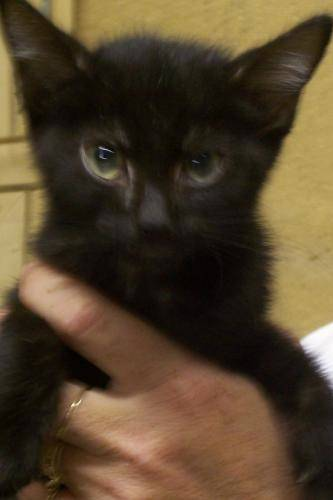

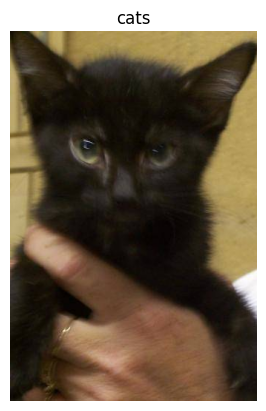

In [10]:
# Let's see random images
view_random_image(train_dir, 'cats')

Image shape: (300, 261, 3)


array([[[ 84, 119,  63],
        [ 58,  93,  37],
        [ 68, 103,  47],
        ...,
        [138, 144, 134],
        [132, 138, 128],
        [132, 138, 128]],

       [[112, 147,  91],
        [ 95, 130,  74],
        [ 83, 118,  62],
        ...,
        [135, 141, 131],
        [135, 141, 131],
        [141, 147, 137]],

       [[109, 144,  90],
        [107, 142,  88],
        [ 79, 114,  60],
        ...,
        [134, 140, 128],
        [136, 142, 130],
        [142, 148, 136]],

       ...,

       [[106, 101,  72],
        [160, 155, 126],
        [159, 152, 124],
        ...,
        [187, 186, 156],
        [167, 166, 136],
        [169, 168, 138]],

       [[109, 105,  76],
        [187, 183, 154],
        [124, 119,  90],
        ...,
        [152, 148, 119],
        [148, 144, 115],
        [149, 145, 116]],

       [[130, 126,  97],
        [152, 148, 119],
        [105, 100,  71],
        ...,
        [162, 158, 129],
        [179, 175, 146],
        [182, 178, 149]]], dtype=uint8)
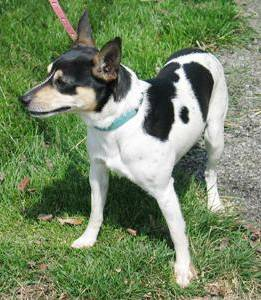

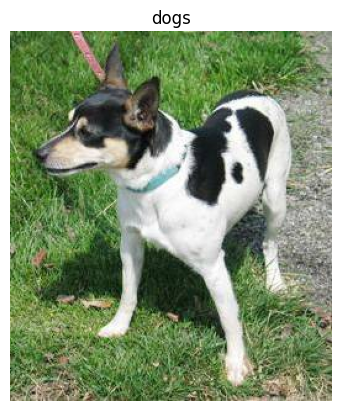

In [11]:
view_random_image(train_dir, 'dogs')

## Model 1

In [12]:
# Create model
model_1 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [13]:
# Compile model
model_1.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics='accuracy')

In [14]:
# Fit model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
251/251 [==============================] - 33s 100ms/step - loss: 0.6499 - accuracy: 0.5886 - val_loss: 0.5837 - val_accuracy: 0.6960
Epoch 2/5
251/251 [==============================] - 23s 90ms/step - loss: 0.5577 - accuracy: 0.7148 - val_loss: 0.5642 - val_accuracy: 0.7133
Epoch 3/5
251/251 [==============================] - 23s 90ms/step - loss: 0.5070 - accuracy: 0.7532 - val_loss: 0.5567 - val_accuracy: 0.7187
Epoch 4/5
251/251 [==============================] - 27s 108ms/step - loss: 0.4322 - accuracy: 0.8009 - val_loss: 0.5547 - val_accuracy: 0.7177
Epoch 5/5
251/251 [==============================] - 23s 91ms/step - loss: 0.3576 - accuracy: 0.8420 - val_loss: 0.6325 - val_accuracy: 0.7242


> Looks like our model_1 is learning very well but it's overfitting a little, the accuracy is almost 20% bigger than its validation accuracy. But we can try some predictions with this model.

## Model 1 predictions

In [15]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.

  return img

In [16]:
def pred_and_plot(model, filename, class_names=class_names, img_shape=224):
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False);

In [24]:
# Download Maia jpeg
!wget https://raw.githubusercontent.com/raphaelrolim/Dogcattack/main/maia.jpeg

--2024-05-23 15:30:09--  https://raw.githubusercontent.com/raphaelrolim/Dogcattack/main/maia.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100149 (98K) [image/jpeg]
Saving to: ‘maia.jpeg’

maia.jpeg           100%[===================>]  97.80K  --.-KB/s    in 0.02s   

2024-05-23 15:30:09 (4.19 MB/s) - ‘maia.jpeg’ saved [100149/100149]



In [25]:
# Download Snow jpeg
!wget https://raw.githubusercontent.com/raphaelrolim/Dogcattack/main/snow.jpeg

--2024-05-23 15:30:25--  https://raw.githubusercontent.com/raphaelrolim/Dogcattack/main/snow.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78433 (77K) [image/jpeg]
Saving to: ‘snow.jpeg’

snow.jpeg           100%[===================>]  76.59K  --.-KB/s    in 0.02s   

2024-05-23 15:30:25 (3.47 MB/s) - ‘snow.jpeg’ saved [78433/78433]



1/1 [==============================] - 0s 17ms/step


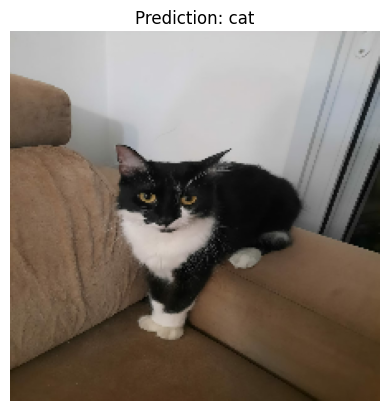

In [26]:
pred_and_plot(model_1, 'maia.jpeg')

1/1 [==============================] - 0s 36ms/step


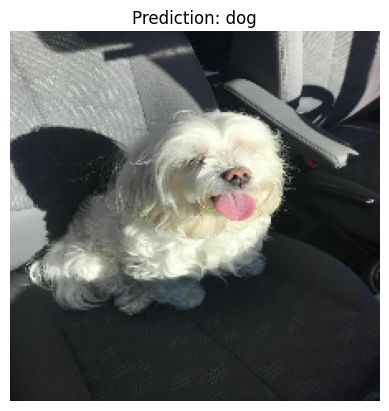

In [27]:
pred_and_plot(model_1, 'snow.jpeg')